In [1]:
import pandas as pd

data = pd.read_csv("/Users/joemcdougall/Documents/Crime_Data_from_2020_to_Present.csv")
data

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,200412582,09/09/2020 12:00:00 AM,09/09/2020 12:00:00 AM,630,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E AVENUE 28,NaN,34.0820,-118.2130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986868,240710284,07/24/2024 12:00:00 AM,07/23/2024 12:00:00 AM,1400,7,Wilshire,788,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,4000 W 23RD ST,NaN,34.0362,-118.3284
986869,240104953,01/15/2024 12:00:00 AM,01/15/2024 12:00:00 AM,100,1,Central,101,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,NaN,NaN,NaN,1300 W SUNSET BL,NaN,34.0685,-118.2460
986870,240410786,10/14/2024 12:00:00 AM,10/11/2024 12:00:00 AM,2330,4,Hollenbeck,421,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,IC,Invest Cont,341.0,NaN,NaN,NaN,1700 ALBION ST,NaN,34.0675,-118.2240
986871,240309674,04/24/2024 12:00:00 AM,04/24/2024 12:00:00 AM,1500,3,Southwest,358,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,FLOWER ST,JEFFERSON BL,34.0215,-118.2868


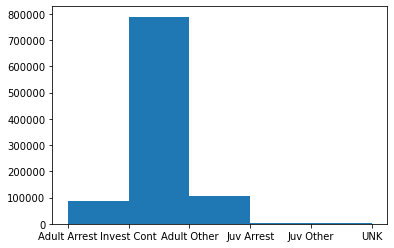

In [5]:
import matplotlib.pyplot as plt

# Example: Descriptive statistics and visualization
#print(data.describe())
plt.hist(data['Status Desc'], bins=5)
plt.show()

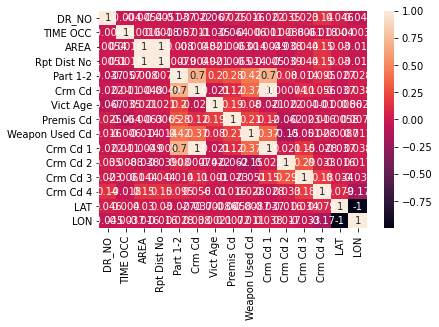

In [6]:
import seaborn as sns

# Example: Correlation heatmap
sns.heatmap(data.corr(), annot=True)
plt.show()

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

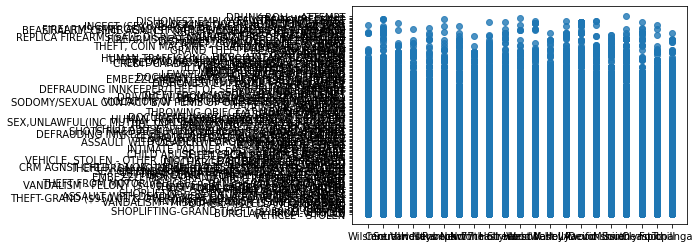

In [7]:
sns.regplot(x='AREA NAME', y='Crm Cd Desc', data=data)

<AxesSubplot:xlabel='AREA NAME', ylabel='Part 1-2'>

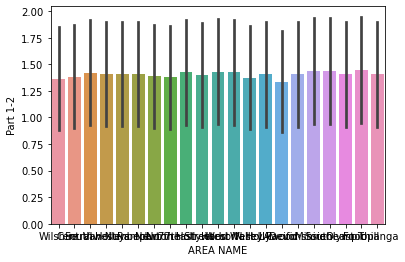

In [8]:
sns.barplot(x='AREA NAME', y='Part 1-2', data=data, ci='sd')

KeyError: 'category'

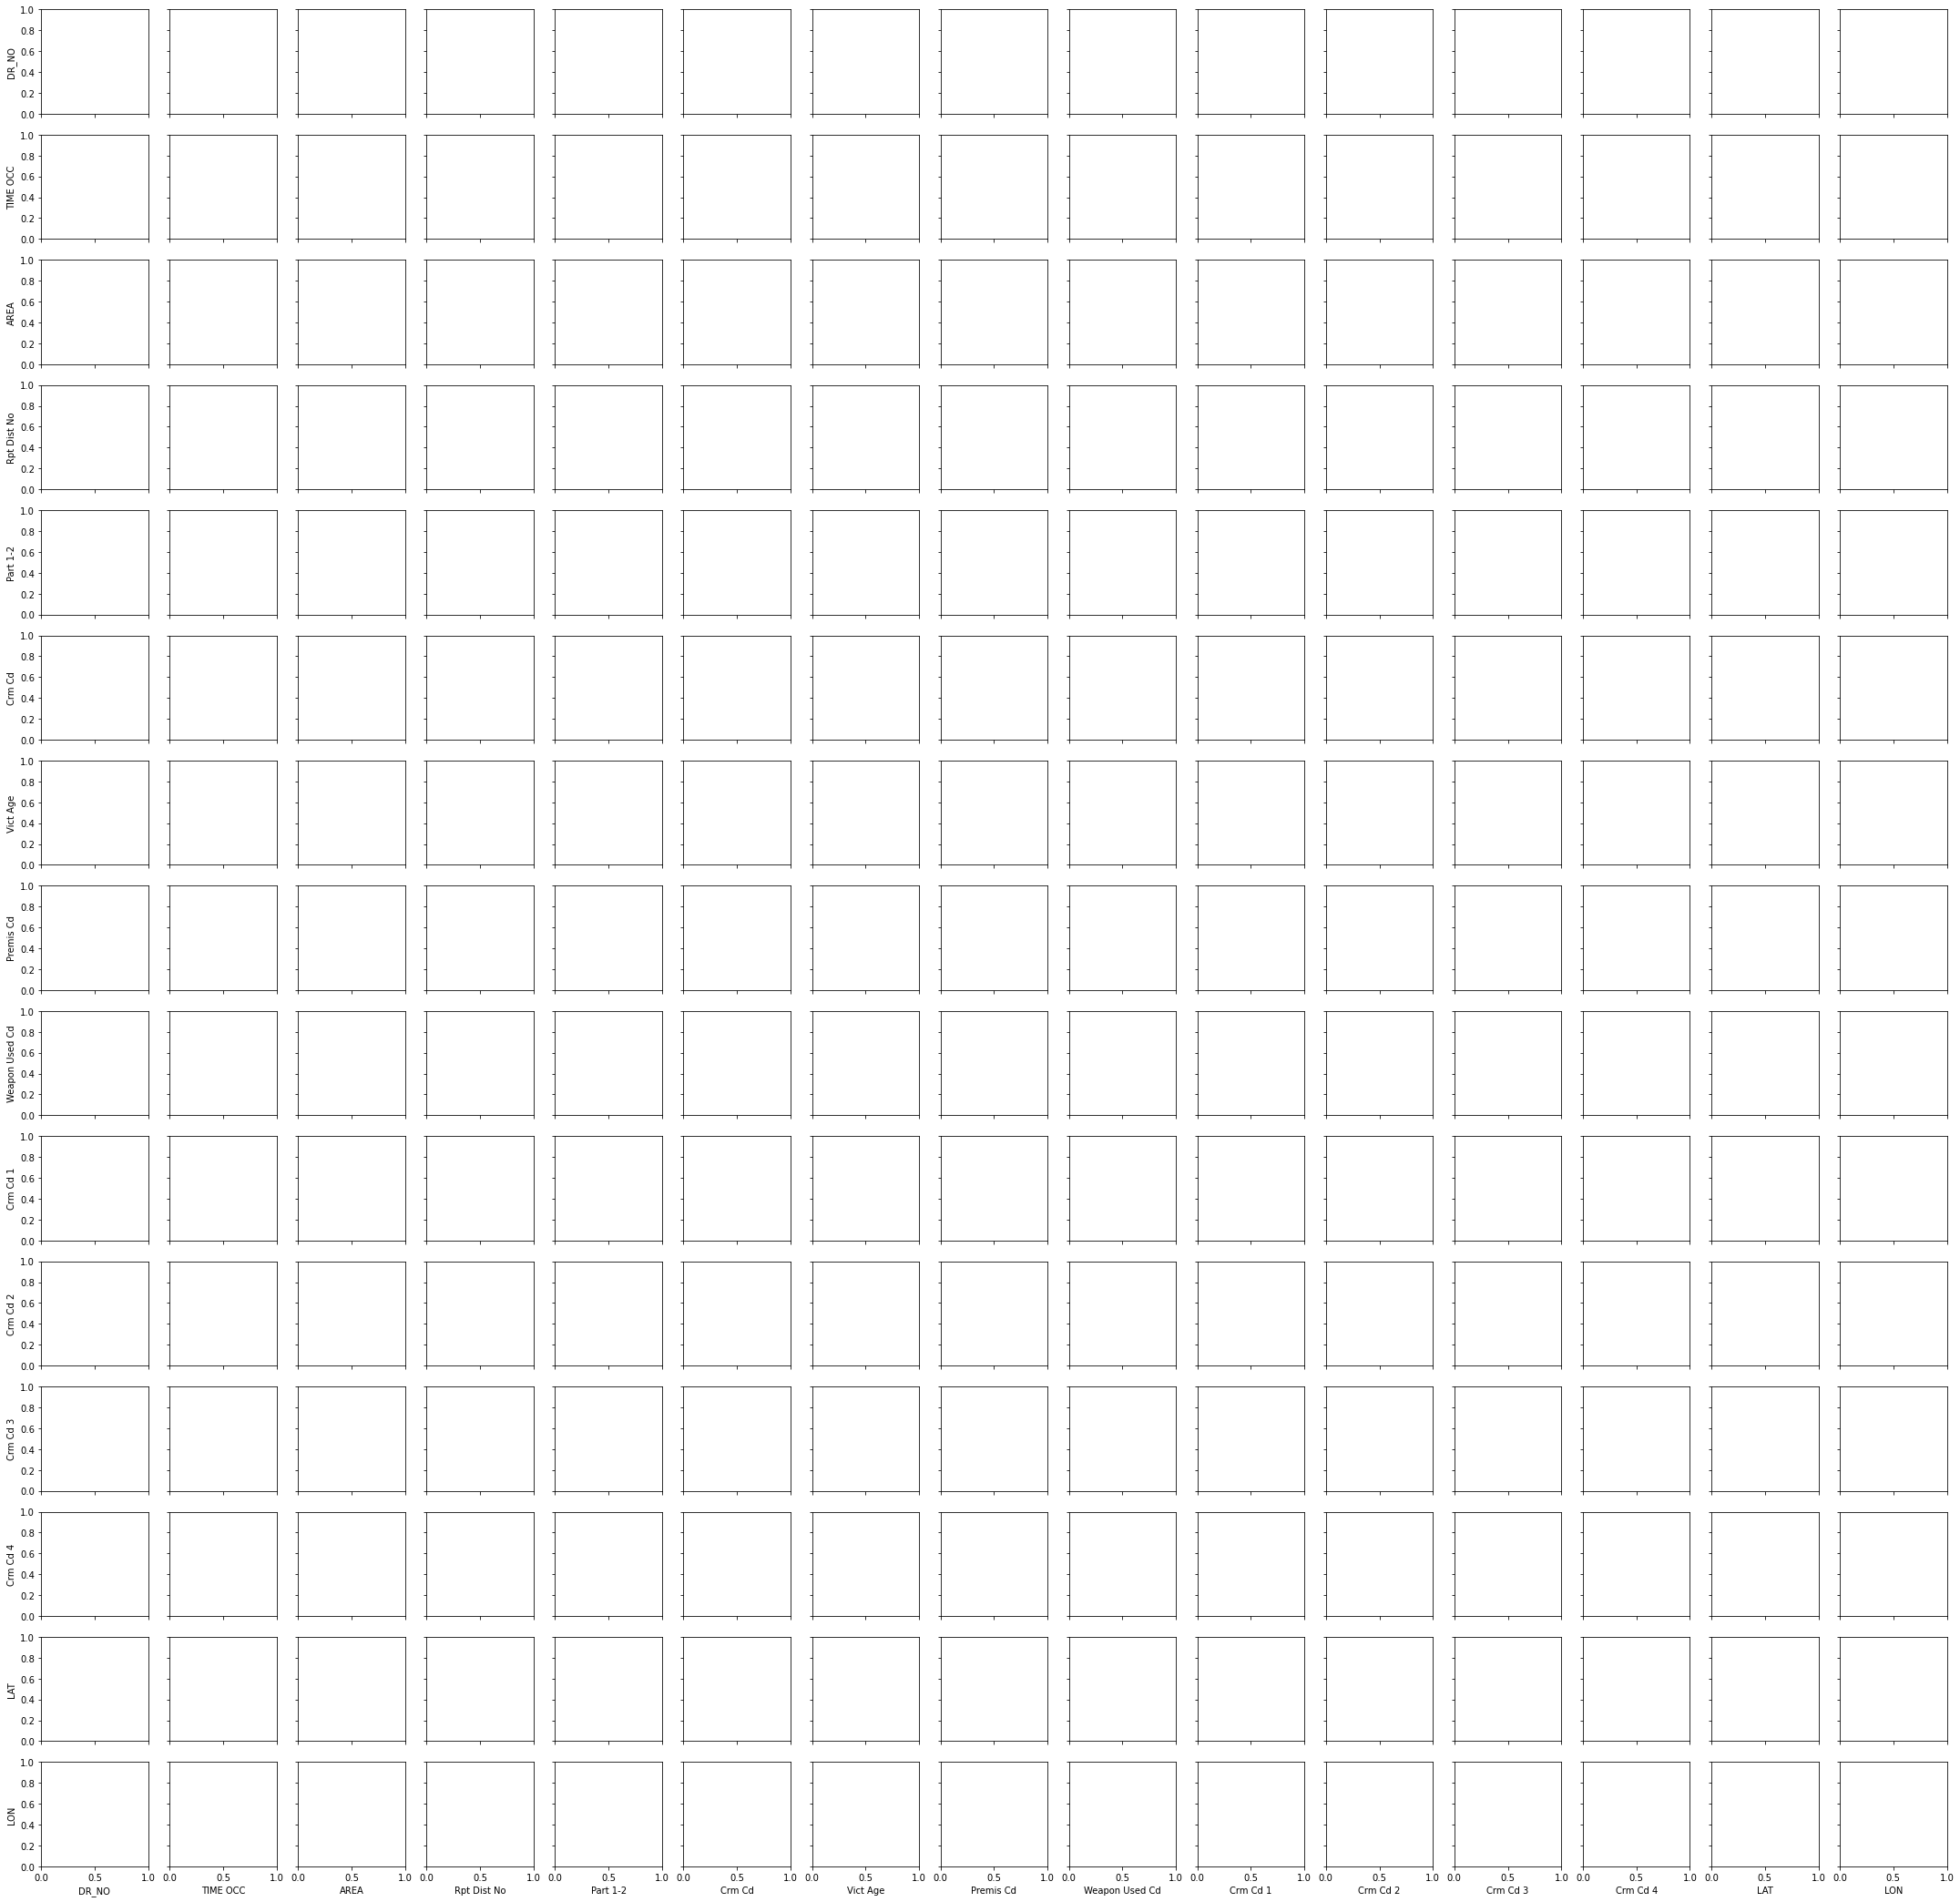

In [9]:
sns.pairplot(data, hue='category')

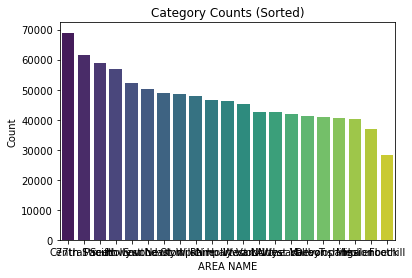

In [10]:
# Count the number of occurrences for each category
category_counts = data['AREA NAME'].value_counts().reset_index()
category_counts.columns = ['AREA NAME', 'Count']

# Sort by count (already sorted in value_counts)
category_counts = category_counts.sort_values(by='Count', ascending=False)

# Plot with Seaborn
sns.barplot(x='AREA NAME', y='Count', data=category_counts, palette="viridis")
plt.title("Category Counts (Sorted)")
plt.show()

In [11]:
with pd.ExcelWriter("/Users/joemcdougall/Documents/category_counts.xlsx", engine="openpyxl") as writer:
    category_counts.to_excel(writer, sheet_name="Counts", index=False)